In [1]:
# importing libraries

import numpy as np
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from numpy.linalg import inv

Populating the interactive namespace from numpy and matplotlib


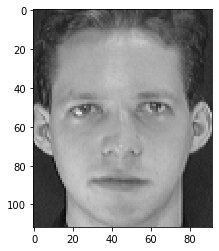

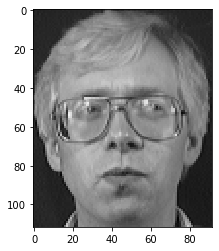

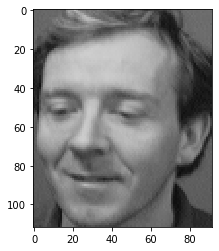

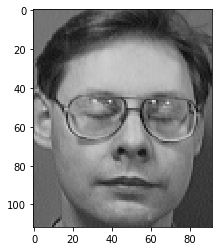

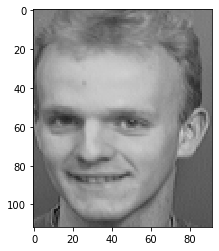

In [2]:
# displaying some sample images from random folders

base_path = 'facial_data/Datasets/att_faces_combined/'
    
img=cv2.imread(base_path + 's1/1.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's2/3.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's3/5.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's4/9.pgm')
imgplot = plt.imshow(img)
plt.show()

img=cv2.imread(base_path + 's5/6.pgm')
imgplot = plt.imshow(img)
plt.show()

leny, lenx, z = img.shape

# Functions to create feature vector, mean vector and eigen vectors , etc.,

In [3]:
# creating feature vector for images from training
      
def create_feature_vec(num_train) :  

    feature_vector = []
    for i in range(1, 41) : # for each folder
        folder_path = base_path + 's' + str(i) + '/'
        for j in range(1, num_train + 1) : # for each image inside the folder si
            img_path = folder_path + str(j) + '.pgm'
            im = Image.open(img_path)
            pix = im.load()

            img_row = []
            for x in range(lenx) :
                for y in range(leny) :
                    img_row.append(pix[x, y])

            feature_vector.append(img_row)

    feature_vector = np.array(feature_vector)
    feature_vector_T = np.transpose(feature_vector)
    print("feature vector = ", feature_vector)
    print("shape of feature vector = ", feature_vector.shape)
    print("\n")

    return feature_vector

In [4]:
# mean vector

def create_mean_vec(feature_vector) :

    mean = np.mean(feature_vector, axis = 0)
    mean_T = np.transpose(mean)
    print("mean vector = ", mean)
    print("shape of mean vector = ", mean.shape)
    print("\n")
    return mean, mean_T

In [5]:
# deviation matrix

def create_dev_mat(feature_vector, mean) :

    dev_mat = feature_vector - mean
    dev_mat_T = np.transpose(dev_mat)
    print("deviation matrix = ", dev_mat)
    print("shape of deviation matrix = ", dev_mat.shape)
    print("\n")
    return dev_mat, dev_mat_T

In [6]:
# covariance matrix

def create_cov_matrix(dev_mat, dev_mat_T) :

    cov_mat = np.dot(dev_mat, dev_mat_T)
    print("covariance matrix = ", cov_mat)
    print("shape of covariance matrix = ", cov_mat.shape)
    print("\n")
    return cov_mat

In [7]:
# eigenvalues and eigenvectors

def create_eig_val_vec(cov_mat) :

    eigen_val, eigen_vec = np.linalg.eig(cov_mat)

    eigen_val_s = np.sort(eigen_val)
    eigen_vec_s = eigen_vec[:, eigen_val.argsort()]
    eigen_vec_s = np.fliplr(eigen_vec_s)

    eigen_vec = eigen_vec_s
    eigen_val = eigen_val_s
    
    print("shape of eigen values vector -->",eigen_val.shape)
    print("shape of eigen vector matrix -->",eigen_vec.shape)
    print("\n")

    return eigen_val, eigen_vec

In [8]:
def select_k_eigenvectors(eigen_vec, k) :
    return eigen_vec[:, :k]

In [9]:
def create_eigen_faces(dec_feature_vec, dev_mat) :
    eig_face = np.dot(np.transpose(dec_feature_vec), dev_mat)
    return eig_face

In [10]:
def signature_each_face(eig_face, dev_mat_T) :
    sig_face = np.dot(eig_face, dev_mat_T)
    print("dimension of signature = ", sig_face.shape)
    return sig_face

In [11]:
def prediction_vec(proj_test_face, sig_face, k, num_test, num_train, S, dist_type) :    
    min_idx_each_img = []

    for i in range(num_test * 40) : # for each test image
        test_img_proj = proj_test_face[:, i]
        test_img_proj = np.reshape(test_img_proj, (k, 1))

        dist_vec = []

        for j in range(num_train * 40) : # for each signature of training images
            sig_each_face = sig_face[:, j]
            sig_each_face = np.reshape(sig_each_face, (k, 1))
            if dist_type == "euclidean" :
                dist_vec.append(euclidean_dist(test_img_proj, sig_each_face))
            else :
                dist_vec.append(mahalonobis_dist(test_img_proj, sig_each_face, S))

        dist_vec = np.array(dist_vec)
        #print(dist_vec)
        min_dist = dist_vec[0]
        min_idx = 0

        for j in range(len(dist_vec)) :
            if dist_vec[j] < min_dist :
                min_dist = dist_vec[j]
                min_idx = j
        min_idx_each_img.append(min_idx // num_train + 1) 
    return min_idx_each_img

# Euclidean and Mahalonobis distance functions

In [12]:
def euclidean_dist(a, b) :
    dist = a - b
    sq_dist = np.dot(np.transpose(dist), dist)
    sq_dist = np.sqrt(sq_dist)
    return sq_dist

In [13]:
def mahalonobis_dist(a, b, S_inv) :
    a = np.reshape(a, (a.shape[0], 1))
    b = np.reshape(b, (b.shape[0], 1))
    diff = a - b
    return np.dot(np.dot(diff.T,S_inv),diff)

# Loading Test Data

In [14]:
# creating testing vector
def create_test_vec(num_test) :

    test_vec = list(range(1, 41))
    test_vec =  [ele for ele in test_vec for i in range(num_test)] 

    print("expected values = ",test_vec)
    print("\n")

    return test_vec

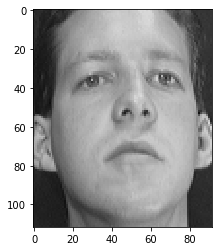

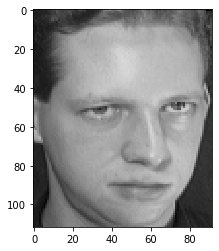

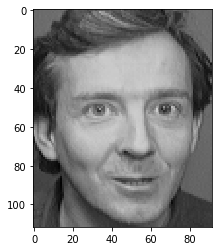

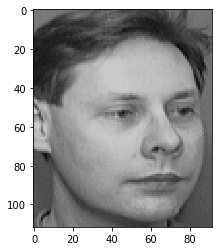

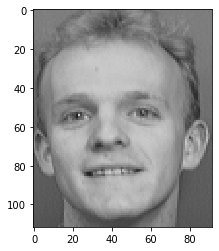

In [15]:
# displaying some sample images from random folders
    
img=cv2.imread(base_path + 's1/9.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's1/10.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's3/10.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's4/10.pgm')
imgplot = plt.imshow(img)
plt.show()

img=cv2.imread(base_path + 's5/10.pgm')
imgplot = plt.imshow(img)
plt.show()

In [16]:
# create the test matrix
    
def create_test_matrix(num_train) :
    
    test_mat = []
    for i in range(1, 41) : # for each folder
        folder_path = base_path + 's' + str(i) + '/'
        for j in range(num_train + 1, 11) :

            img_path = folder_path + str(j) + '.pgm'
            im = Image.open(img_path)
            pix = im.load()

            img_row = []
            for x in range(lenx) :
                for y in range(leny) :
                    img_row.append(pix[x, y])

            test_mat.append(img_row)

    test_mat = np.array(test_mat)
    print("test matrix = ", test_mat)
    print("shape of test matrix = ", test_mat.shape)
    print("\n")
    return test_mat        

In [17]:
# mean zero

def create_mean_zero_test(test_mat, mean) :
    
    dev_test_mat = test_mat - mean
    dev_test_mat_T = np.transpose(dev_test_mat)
    print("mean zero test matrix = ", dev_test_mat)
    print("shape of mean zero test matrix = ", dev_test_mat.shape)
    print("\n")
    return dev_test_mat, dev_test_mat_T

# Function for calculating accuracy

In [18]:
# calculating accuracy

def accuracy(min_idx_each_img, test_vec, num_test) :
    count = 0
    for i in range(num_test * 40) :
        if min_idx_each_img[i] == test_vec[i] :
            count = count + 1
    return (count / (num_test * 40)) * 100

In [19]:
def get_projected_faces(num_train, num_test) :
    
    feature_vector = create_feature_vec(num_train)
    
    # getting mean
    mean, mean_T = create_mean_vec(feature_vector)
    
    # getting deaviation matrix
    dev_mat, dev_mat_T = create_dev_mat(feature_vector, mean)
    
    # getting covariance matrix
    cov_mat = create_cov_matrix(dev_mat, dev_mat_T)
    
    # getting eigen values and eigen vectors
    eigen_val, eigen_vec = create_eig_val_vec(cov_mat)
    
    # getting test matrix
    test_mat = create_test_matrix(num_train)
    
    # getting deviation test matrix
    dev_test_mat, dev_test_mat_T = create_mean_zero_test(test_mat, mean)
    
    # getting actual test values
    test_vec = create_test_vec(num_test)
    
    return test_mat, dev_test_mat, test_vec, eigen_vec, dev_mat

# Function for classification of different train test splits

In [20]:
def diff_cases(num_train, num_test, dist_type = "euclidean") :
    k_val = []
    acc_val = []
    test_mat, dev_test_mat, test_vec, eig_vec, dev_mat = get_projected_faces(num_train, num_test)
    
    for k in range(2, 51):
        
        k_val.append(k)
        print("\nFor k = {}\n".format(k))
    
        dec_feature_vec = select_k_eigenvectors(eig_vec, k)

        eig_face = create_eigen_faces(dec_feature_vec, dev_mat)

        sig_face = signature_each_face(eig_face, dev_mat.T)

        #projected_faces = dec_feature_vec.T
        projected_faces = sig_face
        print("\nProjected faces = ")
        print(projected_faces)
        print("shape = {}\n".format(projected_faces.shape))

        tot_mean = np.mean(projected_faces, axis = 1)
        print("\nMean of all classes = ")
        print(tot_mean)
        print("Shape = {}\n".format(tot_mean.shape))

        mean_classes = []
        dev_classes = []
        covariance_classes = []
        between_classes = []
        for i in range(0, num_train * 40, num_train) :
            classes = projected_faces[:, i: i + num_train]
            mean_cur_class = np.mean(classes, axis = 1)
            mean_cur_class = np.reshape(mean_cur_class, (mean_cur_class.shape[0], 1))
            mean_classes.append(mean_cur_class)
            dev_cur_class = classes - mean_cur_class
            dev_classes.append(dev_cur_class)
            covariance_classes.append(np.dot(dev_cur_class, dev_cur_class.T))
            mean_diff = mean_cur_class - tot_mean
            between_classes.append(k * np.dot(mean_diff, mean_diff.T))

        mean_classes = np.array(mean_classes)
        print("\nMean of individual classes = ")
        print(mean_classes)
        print("Shape = {}\n".format(mean_classes.shape))

        dev_classes = np.array(dev_classes)
        print("\nDeviation from mean each class = ")
        print(dev_classes)
        print("Shape = {}\n".format(dev_classes.shape))

        # covariance matrix for each class
        covariance_classes = np.array(covariance_classes)
        print("\nCovarince matrix for each class = ")
        print(covariance_classes)
        print("Shape = {}\n".format(covariance_classes.shape))

        within_scatter = sum(covariance_classes, axis = 0)
        print("\nWithin scatter matrix = ")
        print(within_scatter)
        print("Shape = {}\n".format(within_scatter.shape))

        between_classes = np.array(between_classes)
        print("\nBetween classes deviation = ")
        print(between_classes)
        print("Shape = {}\n".format(between_classes.shape))

        between_scatter = sum(between_classes, axis = 0)
        between_scatter_inv = np.linalg.inv(between_scatter)
        print("\nBetween scatter matrix = ")
        print(between_scatter)
        print("Shape = {}\n".format(between_scatter.shape))

        J = np.dot(np.linalg.inv(within_scatter), between_scatter)
        print("\nJ = ")
        print(J)
        print("Shape = {}\n".format(J.shape))

        eig_val_criterion, eig_vec_criterion = create_eig_val_vec(J)
        print("\n Eigen values and eigen vectors")
        print(eig_val_criterion)
        print(eig_val_criterion.shape)
        print(eig_vec_criterion)
        print(eig_vec_criterion.shape)
        print("\n")

        # taking m = 20 eigenvectors corresponding to maximum 20 eigen values
        if dist_type == "euclidean" :
            m = min(k, 20)
        else :
            m = k
        new_feat_vec_W = eig_vec_criterion[:, 0:m:]
        print("\nNew feature vec with m columns = ")
        print(new_feat_vec_W)
        print("Shape = {}\n".format(new_feat_vec_W.shape))

        fisher_faces = np.dot(new_feat_vec_W.T, projected_faces)
        print("\nFisher faces = ")
        print(fisher_faces)
        print("Shape = {}\n".format(fisher_faces.shape))

        proj_eigen_face = np.dot(eig_face, dev_test_mat.T)
        print("\nProjected Eigen faces = ")
        print(proj_eigen_face)
        print("Shape = {}\n".format(proj_eigen_face.shape))

        proj_fisher_test = np.dot(new_feat_vec_W.T, proj_eigen_face)
        print("\nProjected fisher for test = ")
        print(proj_fisher_test)
        print("Shape = {}\n".format(proj_fisher_test.shape))

        min_idx_each_img = prediction_vec(proj_fisher_test, fisher_faces, m, num_test, num_train, np.cov(fisher_faces), dist_type)
        print(min_idx_each_img)

        acc = accuracy(min_idx_each_img, test_vec, num_test)
        acc_val.append(acc)
    return k_val, acc_val

# Function for plotting accuracy vs k

In [21]:
def print_accuracy_plot(k_val, acc_val, num_train, num_test) :

    print("Plotting accuracy vs k")    
    plt.plot(k_val, acc_val)
    plt.xlabel('Increasing value of k')
    plt.ylabel('Accuracy')

    plt.xticks(np.arange(min(k_val), max(k_val) + 1, 5.0))
    plt.yticks(np.arange(0, 100, 10.0))

    plt.show()

    print("maximum accuracy for {}-{} split = {}".format(num_train * 10, num_test * 10, max(acc_val)))

# Using Euclidean distance

In [ ]:
k_val1, acc_val1 = diff_cases(6, 4)

In [ ]:
k_val2, acc_val2 = diff_cases(8, 2)

In [ ]:
k_val3, acc_val3 = diff_cases(9, 1)

# Now plotting graphs for results calculated in the above three cells using Euclidean distance

Plotting accuracy vs k


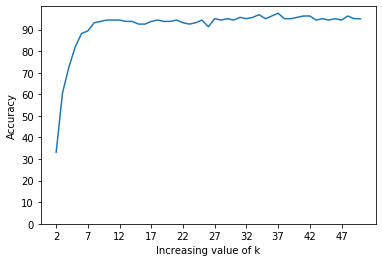

maximum accuracy for 60-40 split = 97.5


In [25]:
print_accuracy_plot(k_val1, acc_val1, 6, 4)

Plotting accuracy vs k


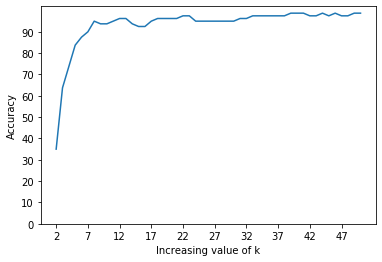

maximum accuracy for 80-20 split = 98.75


In [26]:
print_accuracy_plot(k_val2, acc_val2, 8, 2)

Plotting accuracy vs k


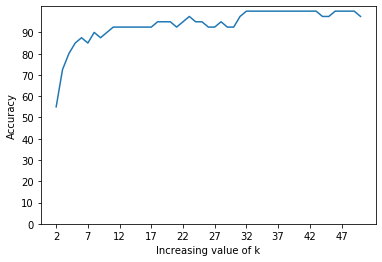

maximum accuracy for 90-10 split = 100.0


In [27]:
print_accuracy_plot(k_val3, acc_val3, 9, 1)

# In case of LDA the maximum accuracy we get for the following train-test splits are:
### 60-40 : 97.5 %
### 80-20 : 98.75 %
### 90-10 : 100.0 %

# In case of PCA(third assignment) the maximum accuracy we get for the following train-test splits are:
### 60-40 : 90.0 %
### 80-20 : 95.0 %
### 90-10 : 95.0 %

# Therefore LDA is providing better accuracy as compared to PCA

# Now

# Using Mahalonobis distance

In [ ]:
k_val1, acc_val1 = diff_cases(6, 4, "mahalonobis")

In [ ]:
k_val2, acc_val2 = diff_cases(8, 2, "mahalonobis")

In [ ]:
k_val3, acc_val3 = diff_cases(9, 1, "mahalonobis")

# Now plotting graphs for results calculated in the above three cells using Mahalonobis distance

Plotting accuracy vs k


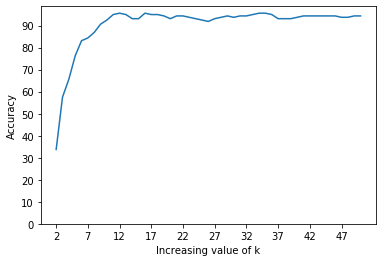

maximum accuracy for 60-40 split = 95.625


In [31]:
print_accuracy_plot(k_val1, acc_val1, 6, 4)

Plotting accuracy vs k


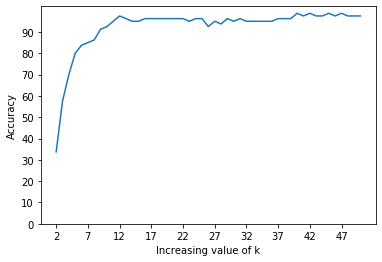

maximum accuracy for 80-20 split = 98.75


In [32]:
print_accuracy_plot(k_val2, acc_val2, 8, 2)

Plotting accuracy vs k


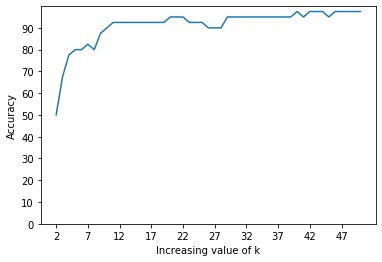

maximum accuracy for 90-10 split = 97.5


In [33]:
print_accuracy_plot(k_val3, acc_val3, 9, 1)

# In case of euclidean distance the accuracy we get for the following train-test splits are:
### 60-40 : 97.5 %
### 80-20 : 98.75 %
### 90-10 : 100.0 %

# In case of Mahalonobis distance the accuracy we get for the following train-test splits are:
### 60-40 : 95.625 %
### 80-20 : 98.75 %
### 90-10 : 97.5 %

# Therefore we get slightly better accuracy in case of Euclidean distance as compared to Mahalonobis distance